In [1]:
import numpy as np
import pandas as pd
import pydicom
from matplotlib import pyplot as plt
from path import Path
import glob

In [2]:
root = Path('../input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/')

In [3]:
trn_path  = Path(root/'stage_2_train')
test_path = Path(root/'stage_2_test')

In [4]:
trn_files = glob.glob(trn_path + '/*.dcm')
test_files = glob.glob(test_path + '/*.dcm')

In [5]:
len(trn_files), len(test_files)

(752803, 121232)

In [6]:
# trn_imgs = [pydicom.dcmread(img) for img in trn_files[:800]]
# test_imgs = [pydicom.dcmread(img) for img in test_files[:200]]

In [7]:
def show_batch(x, nrows = 3, ncols = 3):
    fig=plt.figure(figsize=(9, 9))
    columns = rows = 3
    for i in range(1, columns*rows +1):
        ds = pydicom.dcmread(x[i])
        fig.add_subplot(rows, columns, i)
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        fig.add_subplot

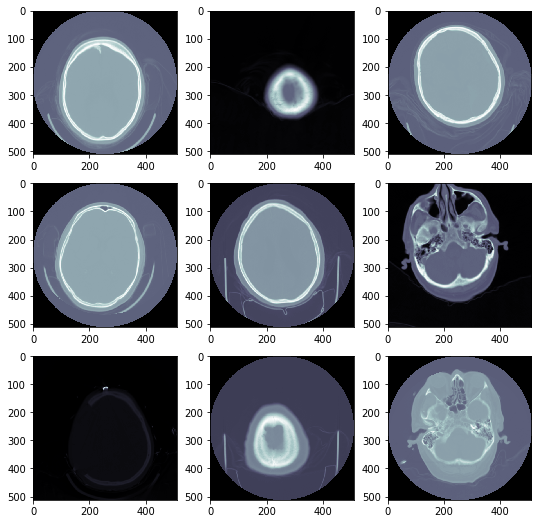

In [9]:
show_batch(trn_files[0:10])

In [ ]:
# fig=plt.figure(figsize=(9, 9))
# columns = rows = 3
# for i in range(1, columns*rows +1):
#     ds = trn_imgs[i]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
#     fig.add_subplot

We see that some of the images are not of the brain but of teeth. Some other images are mostly black because they are images of above or below the brain and hence contain no useful information at all. We will remove all such images.

In [10]:
root2 = Path('../input/rsna-hemorrhage-jpg/meta/meta/')

In [11]:
df = pd.read_feather(root2 / 'comb.fth')
df.head()

,BitsAllocated,BitsStored,Columns,HighBit,ImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,...,img_mean,img_min,img_pct_window,img_std,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,16,16,512,15,1.0,0.0,0.0,0.0,0.927184,-0.374607,...,35.112926,-2000,0.164139,1166.720843,0,0,0,0,0,0
1,16,12,512,11,1.0,0.0,0.0,0.0,1.000000,0.000000,...,234.549896,0,0.076015,392.132243,0,0,0,0,0,0
2,16,16,512,15,1.0,0.0,0.0,0.0,1.000000,0.000000,...,482.248981,0,0.241489,571.235614,1,0,1,1,0,0
3,16,16,512,15,1.0,0.0,0.0,0.0,0.927184,-0.374607,...,106.237759,-2000,0.242466,1253.462451,1,0,1,0,0,0
4,16,12,512,11,1.0,0.0,0.0,0.0,1.000000,0.000000,...,536.799244,9,0.345436,568.654045,0,0,0,0,0,0


In [12]:
df.shape

(674257, 48)

There is a column in the data frame img_pct_window which indicates % of pixels in the brain window. We will use this column to determine which images to discard

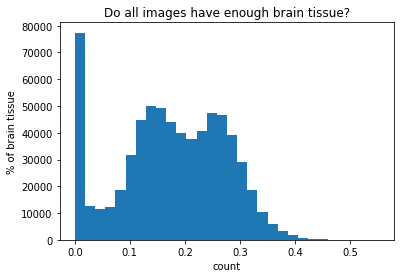

In [13]:
plt.hist(df['img_pct_window'], 30)
plt.xlabel('count')
plt.ylabel('% of brain tissue')
plt.title('Do all images have enough brain tissue?');

Let's check these discarded images

In [14]:
discarded = df[df['img_pct_window'] < 0.2]

In [15]:
dimgs = list(discarded['SOPInstanceUID'].values)
len(dimgs)

386114

In [16]:
dimgs = [root + 'stage_2_train/'+ d + '.dcm' for d in dimgs]
dimgs[0]

Path('../input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/ID_352e89f1c.dcm')

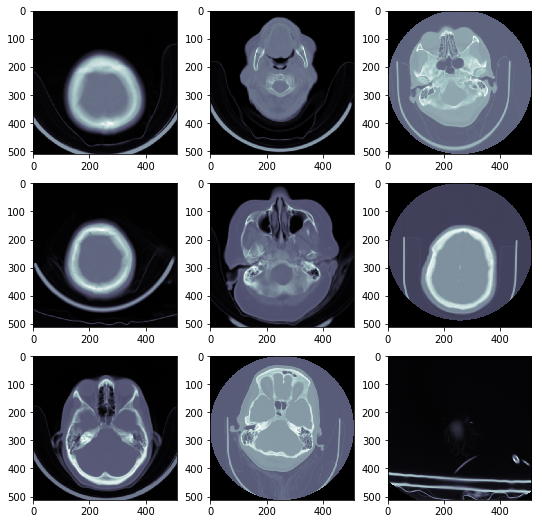

In [18]:
show_batch(dimgs[10:20])